# Project Statement

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.


The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

This time company wants to harness the available data of existing and potential customers to target the right customers.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package. The model will be built to make predictions before a customer is contacted.

Objective

To predict which customer is more likely to purchase the newly introduced travel package.

Data Dictionary

Customer details:

CustomerID: Unique customer ID
ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
Age: Age of customer
TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
Occupation: Occupation of customer
Gender: Gender of customer
NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
PreferredPropertyStar: Preferred hotel property rating by customer
MaritalStatus: Marital status of customer
NumberOfTrips: Average number of trips in a year by customer
Passport: The customer has a passport or not (0: No, 1: Yes)
OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
Designation: Designation of the customer in the current organization
MonthlyIncome: Gross monthly income of the customer
Customer interaction data: 

PitchSatisfactionScore: Sales pitch satisfaction score
ProductPitched: Product pitched by the salesperson
NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
DurationOfPitch: Duration of the pitch by a salesperson to the customer


### Importing the necessary libraries

In [1]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)

### 1. Loading the data set

In [2]:
#Loading dataset
data=pd.read_excel("Tourism.xlsx","Tourism")

In [3]:
data.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

We see total number of rows are 4888, but some columns do not have 4888 values, which means we have missing values to take care of.

In [5]:
#Check for missing values
data.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [6]:
data.dropna(axis=0,how='any',inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4128 non-null   int64  
 1   ProdTaken                 4128 non-null   int64  
 2   Age                       4128 non-null   float64
 3   TypeofContact             4128 non-null   object 
 4   CityTier                  4128 non-null   int64  
 5   DurationOfPitch           4128 non-null   float64
 6   Occupation                4128 non-null   object 
 7   Gender                    4128 non-null   object 
 8   NumberOfPersonVisiting    4128 non-null   int64  
 9   NumberOfFollowups         4128 non-null   float64
 10  ProductPitched            4128 non-null   object 
 11  PreferredPropertyStar     4128 non-null   float64
 12  MaritalStatus             4128 non-null   object 
 13  NumberOfTrips             4128 non-null   float64
 14  Passport

In [8]:
#So now we have a total of 4128 rows after removing obvious missing values.

Also, we can drop Customer ID number since this won't impact or have any effect on our analysis.

In [9]:
data.drop('CustomerID', axis = 'columns', inplace=True)

In [10]:
data

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4128 non-null   int64  
 1   Age                       4128 non-null   float64
 2   TypeofContact             4128 non-null   object 
 3   CityTier                  4128 non-null   int64  
 4   DurationOfPitch           4128 non-null   float64
 5   Occupation                4128 non-null   object 
 6   Gender                    4128 non-null   object 
 7   NumberOfPersonVisiting    4128 non-null   int64  
 8   NumberOfFollowups         4128 non-null   float64
 9   ProductPitched            4128 non-null   object 
 10  PreferredPropertyStar     4128 non-null   float64
 11  MaritalStatus             4128 non-null   object 
 12  NumberOfTrips             4128 non-null   float64
 13  Passport                  4128 non-null   int64  
 14  PitchSat

In [12]:
data['Gender'].value_counts()

Male       2463
Female     1510
Fe Male     155
Name: Gender, dtype: int64

We can convert this "Fe Male" to Female.

In [13]:
# Applying the condition
data.loc[data["Gender"] == "Fe Male", "Gender"] = "Female"

In [14]:
data['Gender'].value_counts()

Male      2463
Female    1665
Name: Gender, dtype: int64

### 2.0 Exploratory Data Analysis

Our target/dependent variable is "ProdTaken".

#### 2.1 Univariate analysis

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
#2.1.1 Histogram and boxplot of ProdTaken column

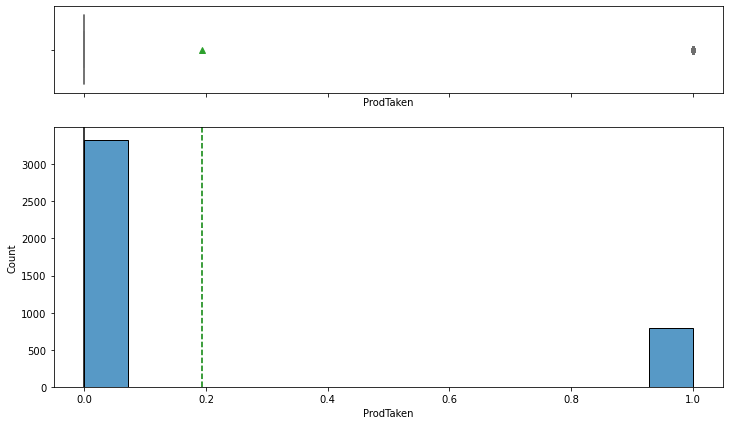

In [17]:
histogram_boxplot(data, "ProdTaken")

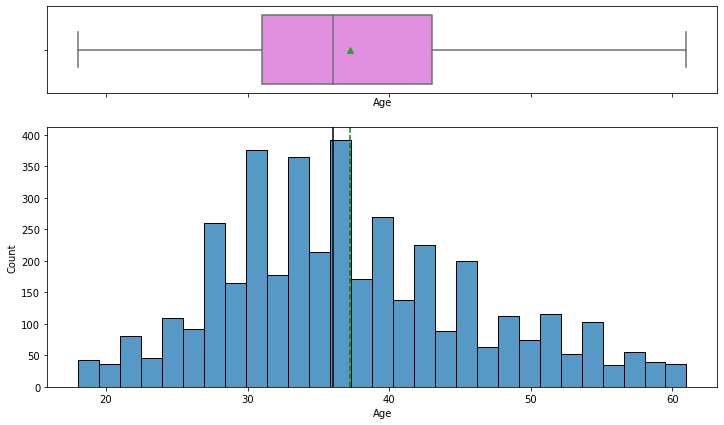

In [18]:
#2.1.2 Histogram and boxplot of Age column
histogram_boxplot(data, "Age")

Mean age of our customers is 37, which the median age is 36. 75% of our customers are 43 years old. The oldest customer is 61 years old.

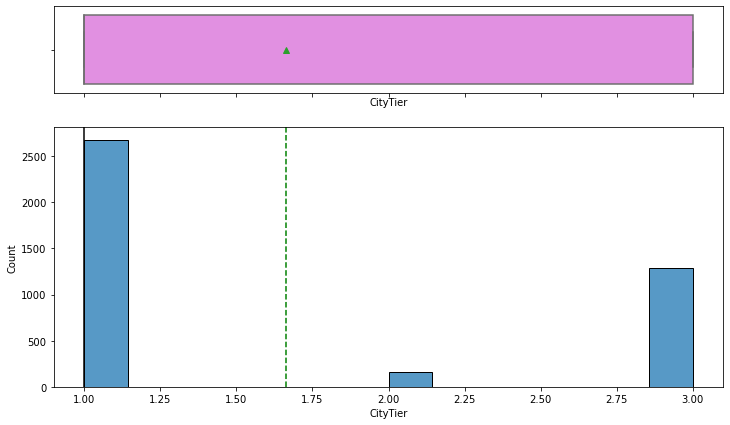

In [19]:
#2.1.3 Histogram and boxplot of CityTier column
histogram_boxplot(data, "CityTier")

Around 2700 customers live in Tier 1, 1300 customers live in Tier 3 and 160 customers live in Tier 2.

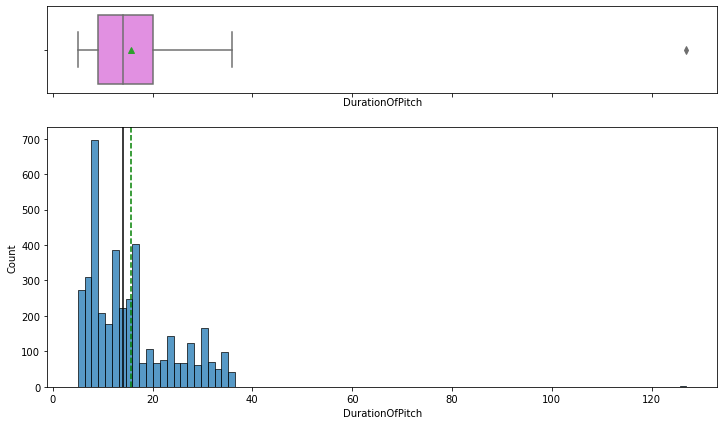

In [20]:
#2.1.4 Let's check Duration of pitch
histogram_boxplot(data, "DurationOfPitch")

Mean duration of pictch is 15, while the median duration of pitch is 14, maximum duration of pitch is 127.

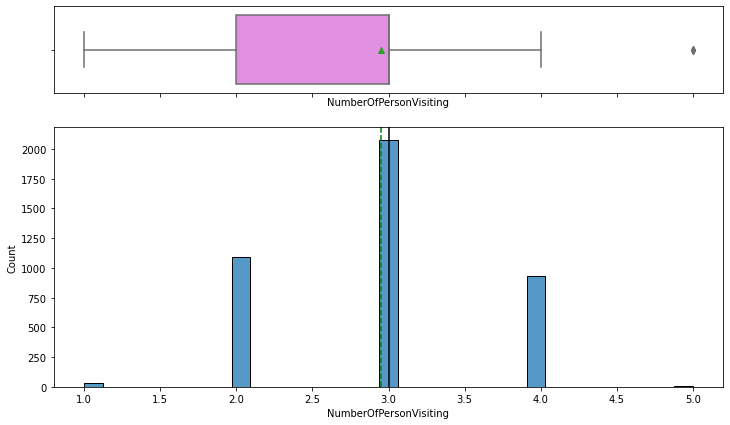

In [21]:
#2.1.5 Let's check NumberOfPersonVisiting
histogram_boxplot(data, "NumberOfPersonVisiting")

Most customers have 3 additional people taking the trip with me. The second highest number of people who take the trip are 2, which is closely followed by 4 people taking the trip.

We also some outliers which will have to be handled.

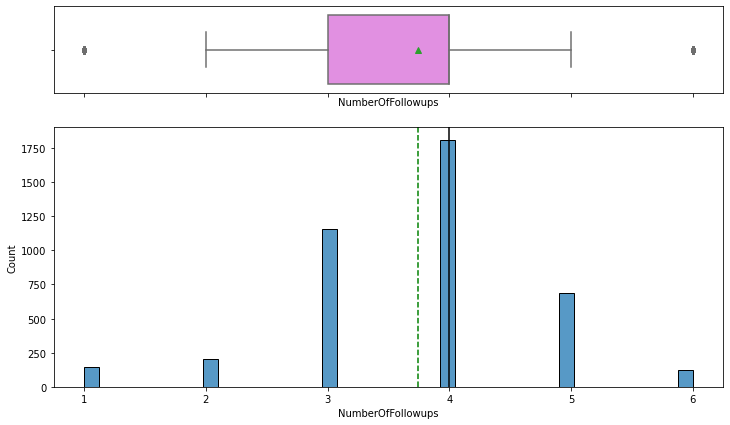

In [22]:
#2.1.6 Let's check NumberOfFollowups 
histogram_boxplot(data, "NumberOfFollowups")

Highest number of follow-ups done by the sales person is 4, followed by 3 and then 5.

We also some outliers which will have to be handled.

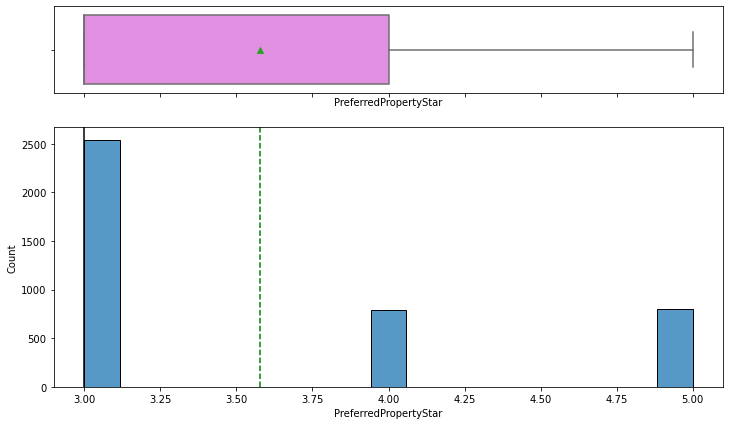

In [23]:
#2.1.7 Let's check PreferredPropertyStar
histogram_boxplot(data, "PreferredPropertyStar")

Most customers prefer a 3 star property, and 4/5 star properties are almost equally liked by customers but liked much lesser than 3 star properties.

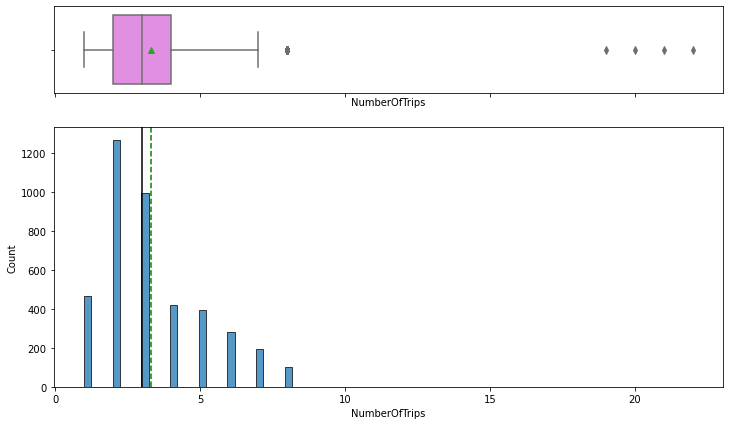

In [24]:
#2.1.8 Let's check NumberOfTrips
histogram_boxplot(data, "NumberOfTrips")

1. We have some outliers which need to be handeled.
2. Maximum customers take 3 trips in a year, followed by 4, and then 3.

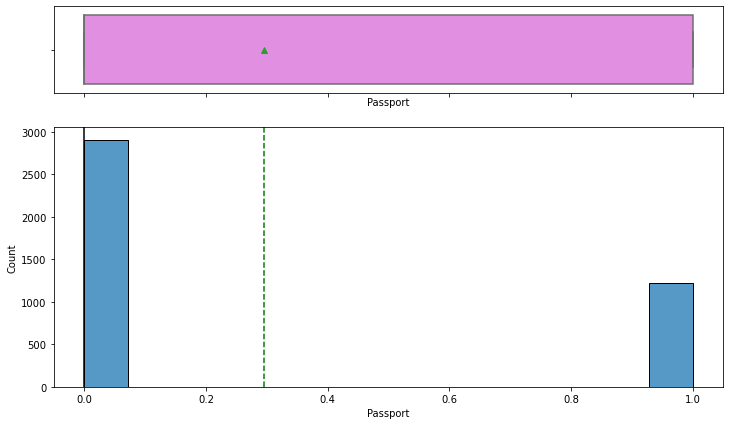

In [25]:
#2.1.9 Let's check Passport
histogram_boxplot(data, "Passport")

Most customers don't have a passport.

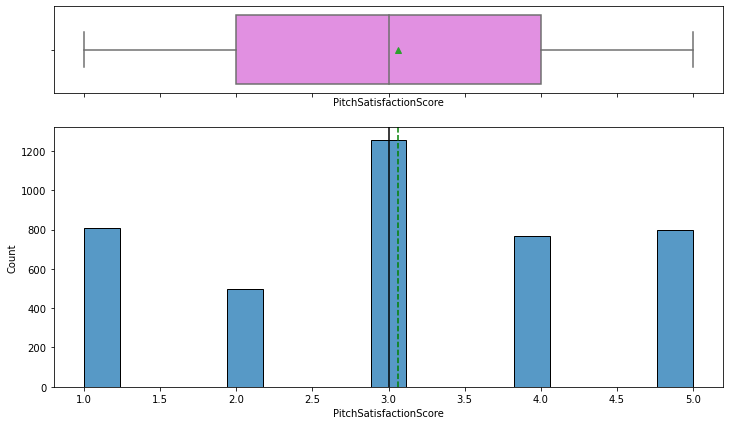

In [26]:
#2.1.10 Let's check PitchSatisfactionScore
histogram_boxplot(data, "PitchSatisfactionScore")

Most customers have rated the sales pitch a score of 3, which is followed a tie of ratings 1 and 5.

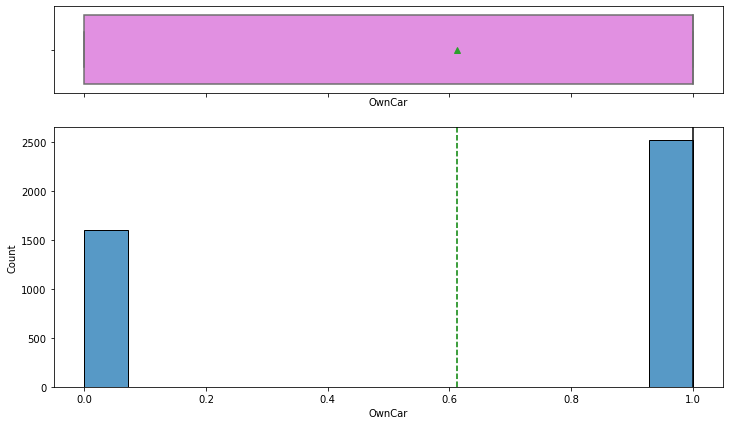

In [27]:
#2.1.11 Let's check OwnCar
histogram_boxplot(data, "OwnCar")

Most customers own a car while about 1600 don't own a car.

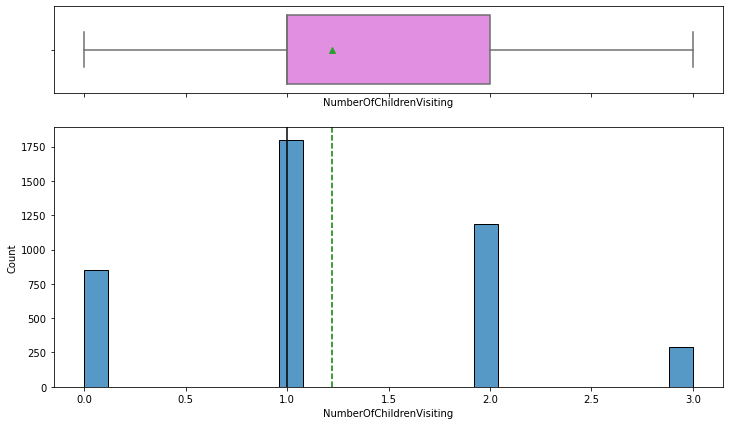

In [28]:
#2.1.12 Let's check NumberOfChildrenVisiting
histogram_boxplot(data, "NumberOfChildrenVisiting")

Most customers have 1 child visiting them, which is followed by 2 and then no child visiting them.

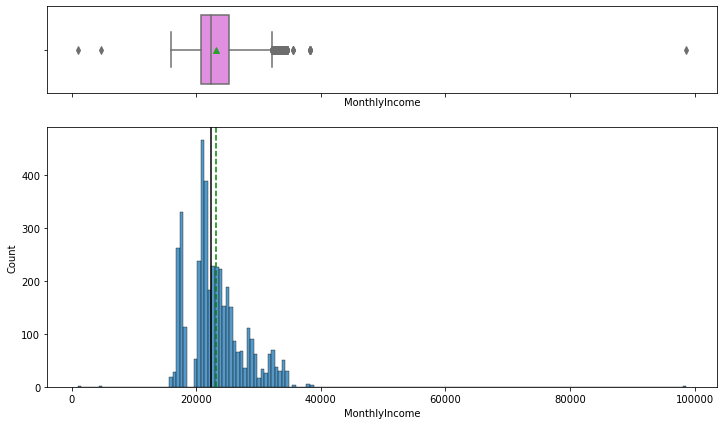

In [29]:
#2.1.13 Let's check MonthlyIncome
histogram_boxplot(data, "MonthlyIncome")

We have a few outliers here. 

Mean monthly income of our customers is 23178, while the median is 22418. The maximum salary of our customers is 98678.

#### 2.2 Bi-variate analysis

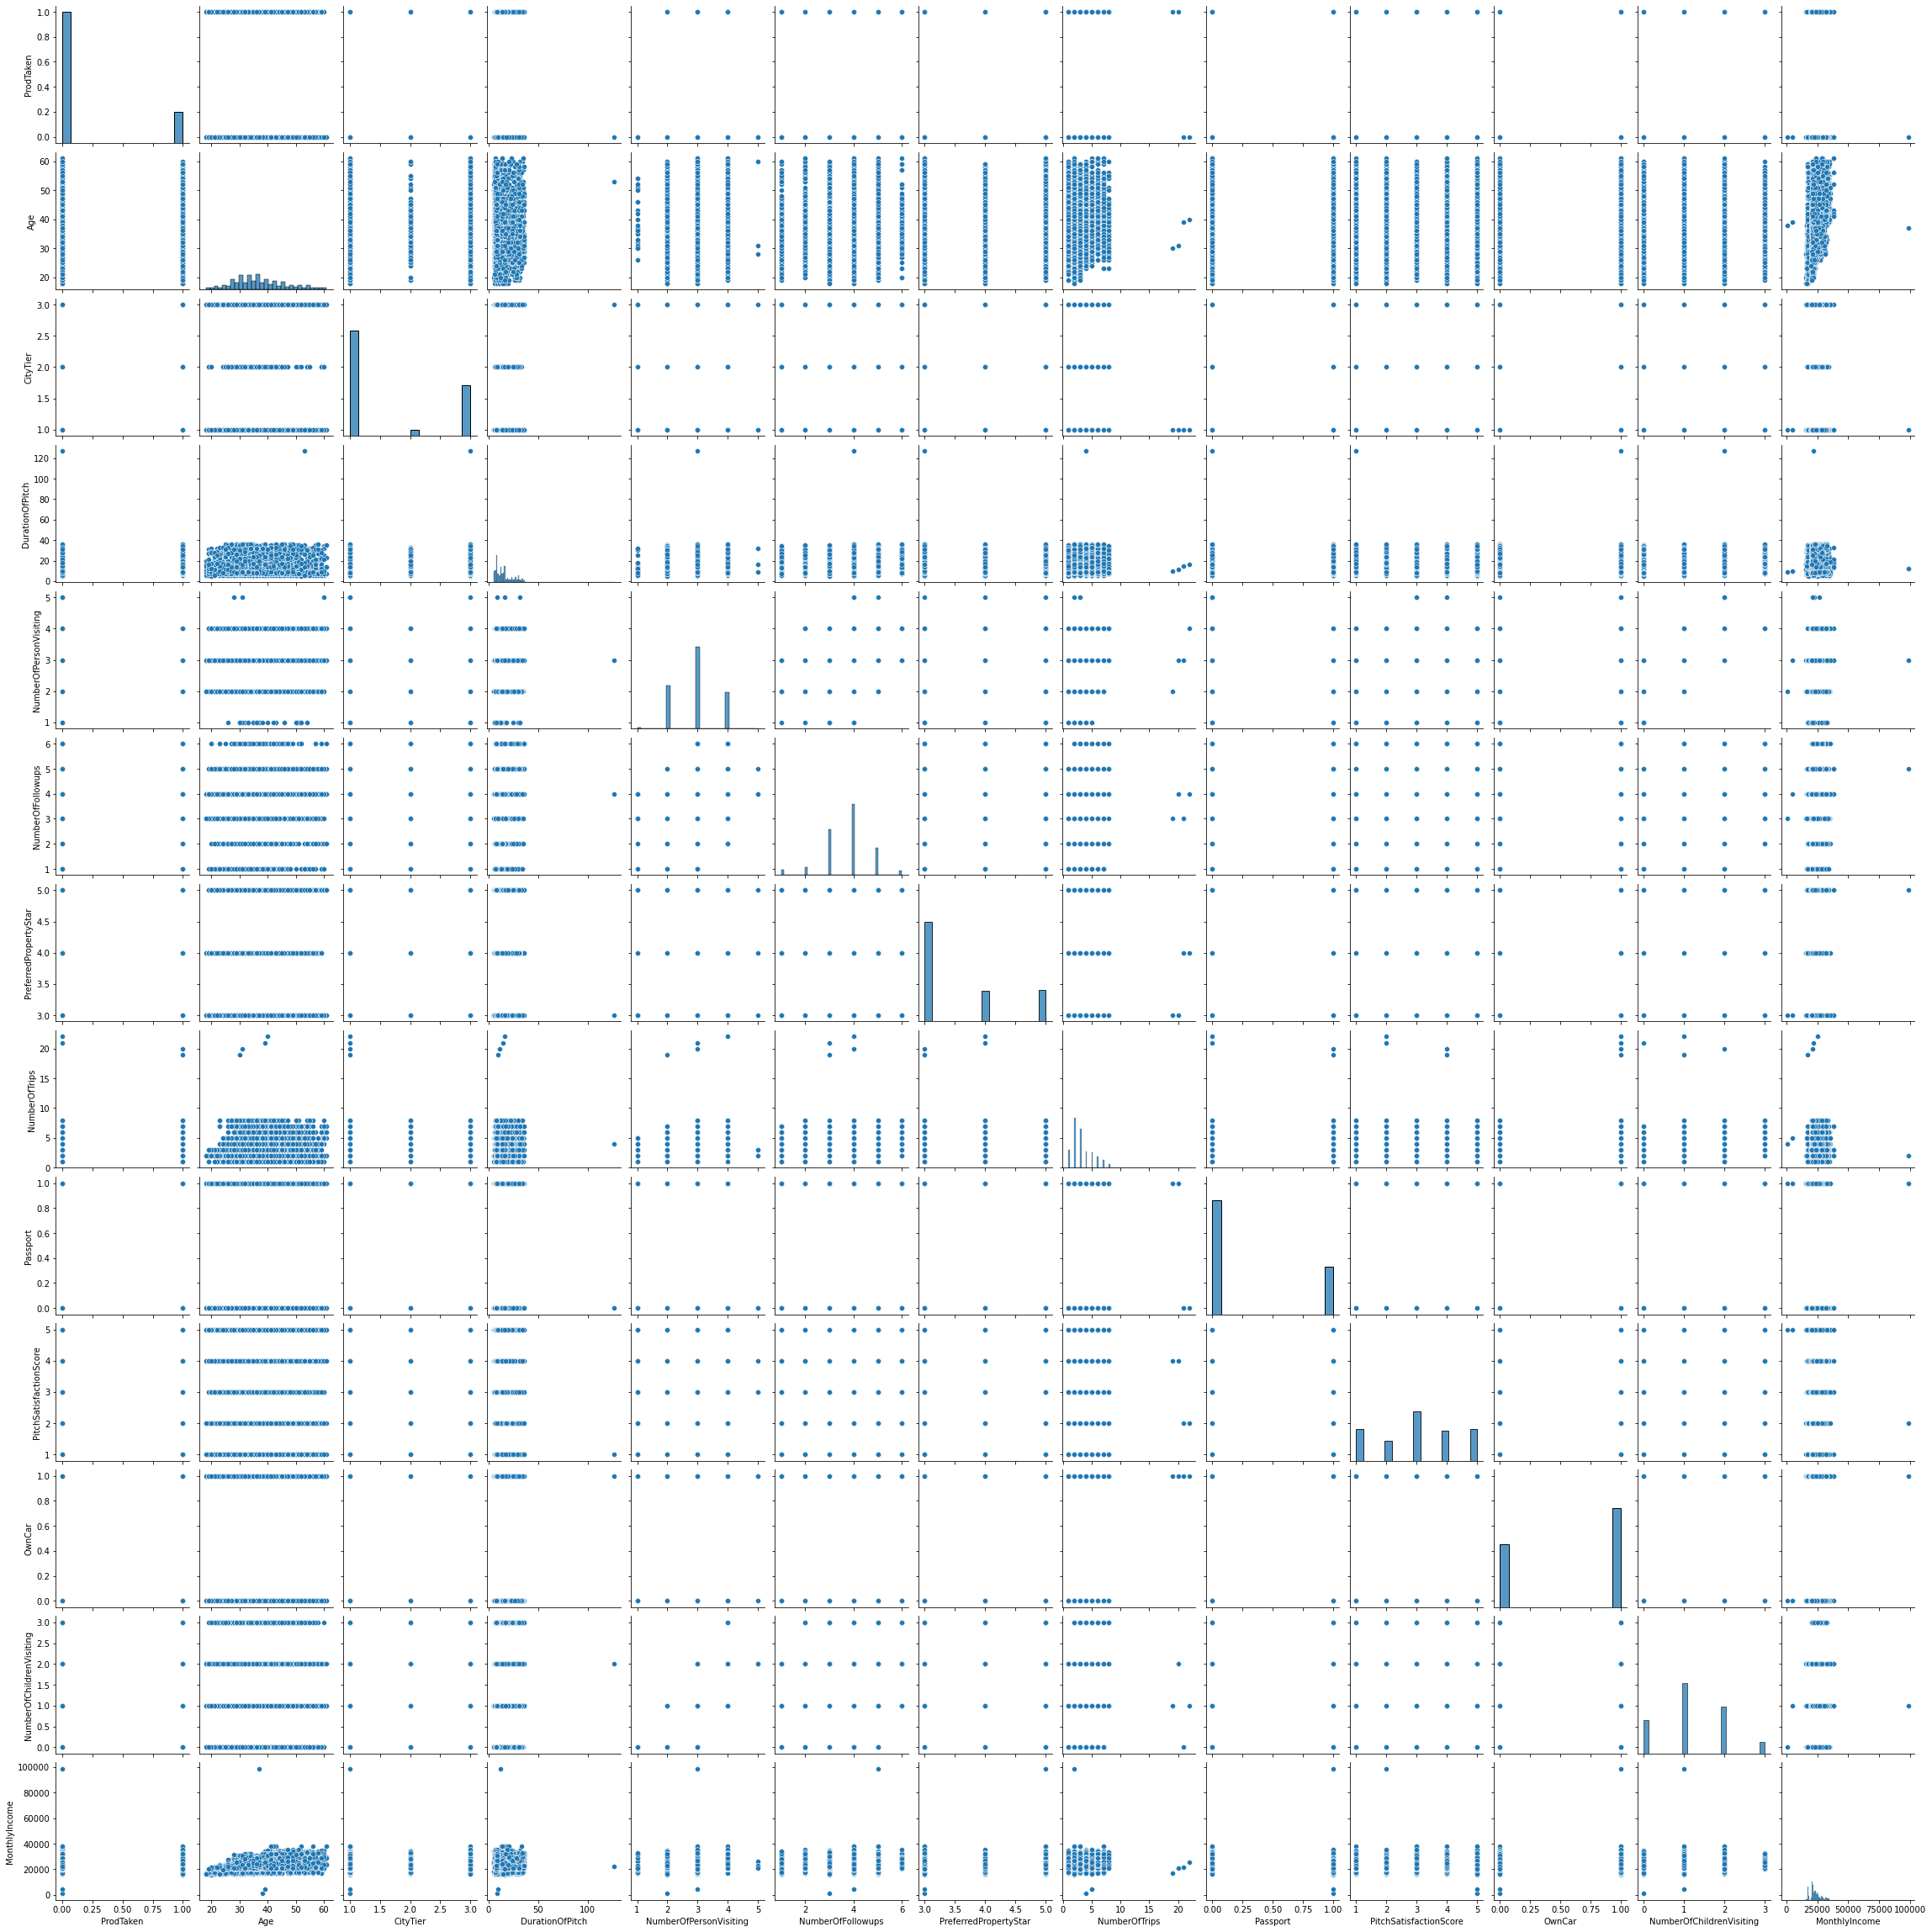

In [30]:
#2.2.1 Create a pairplot on the loan strategy data frame and display the output.
sns.pairplot(data)
plt.show()

Observations:
1. There is a correlation between number of trips and age.
2. There is a moderate to strong correlation between monthly income and age.
3. There is a medium correlation between monthly income and number of trips.

In [31]:
#2.2.2 correlation matrix
data.corr()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.154934,0.090921,0.082220,0.003716,0.110966,0.100325,0.015424,0.271293,0.052029,-0.008681,0.008491,-0.133581
Age,-0.154934,1.000000,0.005257,-0.002732,-0.024490,-0.025567,-0.030549,0.173654,0.027115,0.012785,0.038271,-0.030354,0.419913
CityTier,0.090921,0.005257,1.000000,0.011842,0.001327,0.026067,-0.016851,-0.016664,0.004885,-0.028863,0.011830,0.002407,0.090698
DurationOfPitch,0.082220,-0.002732,0.011842,1.000000,0.076593,0.016850,-0.007312,0.007090,0.036499,0.007625,0.002442,0.039902,0.026268
NumberOfPersonVisiting,0.003716,-0.024490,0.001327,0.076593,1.000000,0.324766,0.041511,0.186989,0.006441,-0.017631,0.009644,0.597235,0.138246
NumberOfFollowups,0.110966,-0.025567,0.026067,0.016850,0.324766,1.000000,-0.018089,0.131478,0.001100,0.005452,0.009964,0.282981,0.139316
PreferredPropertyStar,0.100325,-0.030549,-0.016851,-0.007312,0.041511,-0.018089,1.000000,0.006867,0.001218,-0.019274,0.016361,0.041839,0.006013
NumberOfTrips,0.015424,0.173654,-0.016664,0.007090,0.186989,0.131478,0.006867,1.000000,0.009450,-0.005757,-0.015060,0.166316,0.118825
Passport,0.271293,0.027115,0.004885,0.036499,0.006441,0.001100,0.001218,0.009450,1.000000,0.009694,-0.027491,0.016467,0.003180
PitchSatisfactionScore,0.052029,0.012785,-0.028863,0.007625,-0.017631,0.005452,-0.019274,-0.005757,0.009694,1.000000,0.071990,0.000391,0.021525


Observations:

1. Monthly income and age are moderately correlated.
2. Number of children visiting and number of person visiting with the customer are moderately correlated.
3. There is a slight correlation between number of trips and monthly income.

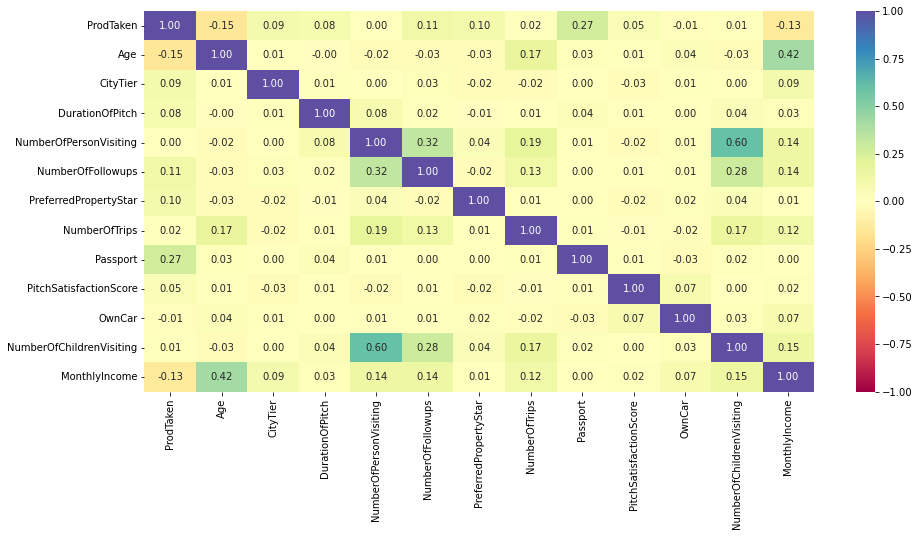

In [32]:
#2.2.3 Here we are drawing a heatmap of the correlation matrix in the previous step and each variable's correlation is shown with corresponding columns
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, 
            fmt=".2f", cmap="Spectral")
plt.show()

<AxesSubplot:xlabel='MaritalStatus'>

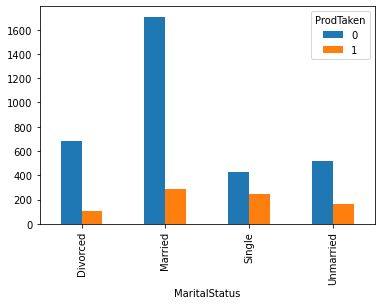

In [33]:
#2.2.4 A crosstab to show whether the customer bought the product last time based on their marital status.
pd.crosstab(data['MaritalStatus'],data['ProdTaken']).plot.bar()

1. Among those who took the product, married couple took most of the products, closely followed by single people, followed by unmarried and lastly by divorced people.
2. Among those who did not take the product, married couple were at the top, followed by divorced people, followed by unmarried and lastly by single people.

<AxesSubplot:xlabel='NumberOfTrips'>

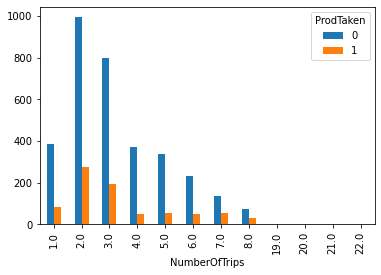

In [34]:
#2.2.5 A crosstab to show whether the customer bought the product last time based on their number of trips in the past.
pd.crosstab(data['NumberOfTrips'],data['ProdTaken']).plot.bar()

Observations:

1. Those who took 2 trips were those who took the product the most. This was followed by those who took 3 trips and took the product.
2. There were many people who took 2 trips and did not take the product, followed by people with 3 trips who did not take the product.

<AxesSubplot:xlabel='Passport'>

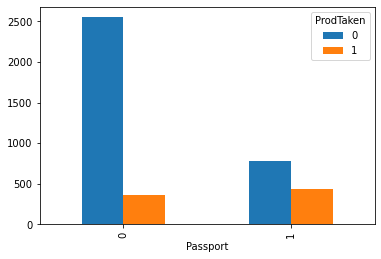

In [35]:
#2.2.6 A crosstab to show whether the customer bought the product last time based on whether they have a passport or not.
pd.crosstab(data['Passport'],data['ProdTaken']).plot.bar()

Observations:
1. There were lesser number of people with passport who took the product versus those who did not take the product with passport.
2. There were very less number of those without passport who took the product as compared to those who did not take the product without passport.

Insights into customer profile about prospective clients who can or cannot buy the product.
1. Married people tend to take the product the most followed by single people, followed by unmarried and lastly by divorced people.
2. Among those who did not take the product, married couple were at the top, followed by divorced people, followed by unmarried and lastly by single people.
3. Customers who have taken 2 trips in the past tend to take the product the most, followed by those who took 3 trips. This, unfortunately, is also the case with customers who did not buy the product.
4. Customers who have a passport tend to take the product more than those who take the product without a passport.

### 3. Checking columns to identify which columns can be used as categorical columns

In [36]:
#1. First let's check ProdTaken
data['ProdTaken'].value_counts()

0    3331
1     797
Name: ProdTaken, dtype: int64

In [37]:
#2. Let's check TypeOfContact
data['TypeofContact'].value_counts()

Self Enquiry       2918
Company Invited    1210
Name: TypeofContact, dtype: int64

In [38]:
#3. Let's check CityTier
data['CityTier'].value_counts()

1    2678
3    1288
2     162
Name: CityTier, dtype: int64

In [39]:
#4. Let's check Occupation
data['Occupation'].value_counts()

Salaried          1999
Small Business    1746
Large Business     381
Free Lancer          2
Name: Occupation, dtype: int64

In [40]:
#5. Let's check Gender
data['Gender'].value_counts()

Male      2463
Female    1665
Name: Gender, dtype: int64

In [41]:
#6. Let's check NumberOfPersonVisiting
data['NumberOfPersonVisiting'].value_counts()

3    2078
2    1089
4     930
1      28
5       3
Name: NumberOfPersonVisiting, dtype: int64

In [42]:
#7. Let's check NumberOfFollowups
data['NumberOfFollowups'].value_counts()

4.0    1811
3.0    1157
5.0     686
2.0     206
1.0     144
6.0     124
Name: NumberOfFollowups, dtype: int64

In [43]:
#8. Let's check ProductPitched
data['ProductPitched'].value_counts()

Basic           1615
Deluxe          1422
Standard         737
Super Deluxe     250
King             104
Name: ProductPitched, dtype: int64

In [44]:
#9. Let's check PreferredPropertyStar
data['PreferredPropertyStar'].value_counts()

3.0    2541
5.0     801
4.0     786
Name: PreferredPropertyStar, dtype: int64

In [45]:
#10. Let's check MaritalStatus
data['MaritalStatus'].value_counts()

Married      1990
Divorced      789
Unmarried     682
Single        667
Name: MaritalStatus, dtype: int64

In [46]:
#11. Let's check Passport
data['Passport'].value_counts()

0    2909
1    1219
Name: Passport, dtype: int64

In [47]:
#12. Let's check PitchSatisfactionScore
data['PitchSatisfactionScore'].value_counts()

3    1257
1     806
5     798
4     767
2     500
Name: PitchSatisfactionScore, dtype: int64

In [48]:
#13. Let's check OwnCar
data['OwnCar'].value_counts()

1    2527
0    1601
Name: OwnCar, dtype: int64

In [49]:
#14. Let's check NumberOfChildrenVisiting
data['NumberOfChildrenVisiting'].value_counts()

1.0    1800
2.0    1186
0.0     849
3.0     293
Name: NumberOfChildrenVisiting, dtype: int64

In [50]:
#15. Let's check Designation
data['Designation'].value_counts()

Executive         1615
Manager           1422
Senior Manager     737
AVP                250
VP                 104
Name: Designation, dtype: int64

All above columns can be converted into categorical columns.

In [51]:
#cat_cols=['ProdTaken','TypeofContact','CityTier','Occupation','Gender','NumberOfPersonVisiting','NumberOfFollowups','ProductPitched','PreferredPropertyStar','MaritalStatus','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','Designation']
cat_cols=['TypeofContact','CityTier','Occupation','Gender','NumberOfPersonVisiting','NumberOfFollowups','ProductPitched','PreferredPropertyStar','MaritalStatus','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','Designation']

In [52]:
cat_cols

['TypeofContact',
 'CityTier',
 'Occupation',
 'Gender',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'ProductPitched',
 'PreferredPropertyStar',
 'MaritalStatus',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'Designation']

In [53]:
for column in cat_cols:
    data[column] = data[column].astype('category')

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4128 non-null   int64   
 1   Age                       4128 non-null   float64 
 2   TypeofContact             4128 non-null   category
 3   CityTier                  4128 non-null   category
 4   DurationOfPitch           4128 non-null   float64 
 5   Occupation                4128 non-null   category
 6   Gender                    4128 non-null   category
 7   NumberOfPersonVisiting    4128 non-null   category
 8   NumberOfFollowups         4128 non-null   category
 9   ProductPitched            4128 non-null   category
 10  PreferredPropertyStar     4128 non-null   category
 11  MaritalStatus             4128 non-null   category
 12  NumberOfTrips             4128 non-null   float64 
 13  Passport                  4128 non-null   catego

We have now removed missing values, updated gender column's values and also updated the type of columns for categorical columns.

During this process, we have also reduced the memory usage of the input file from 774 KB to 353 KB.

### 4.0 Doing some statistical analysis + Feature Engineering + Outlier Treatment

4.1 Analysis

In [55]:
data.describe()

,ProdTaken,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome
count,4128.000000,4128.000000,4128.000000,4128.0000,4128.000000
mean,0.193072,37.231831,15.584787,3.2953,23178.464147
std,0.394757,9.174521,8.398142,1.8563,4506.614622
min,0.000000,18.000000,5.000000,1.0000,1000.000000
25%,0.000000,31.000000,9.000000,2.0000,20751.000000
50%,0.000000,36.000000,14.000000,3.0000,22418.000000
75%,0.000000,43.000000,20.000000,4.0000,25301.000000
max,1.000000,61.000000,127.000000,22.0000,98678.000000


Observations:

1. Mean age of our customers is 37, which the median age is 36. 75% of our customers are 43 years old. The oldest customer is 61 years old.
2. Mean duration of pictch is 15, while the median duration of pitch is 14, maximum duration of pitch is 127.
3. Mean and median number of trips made by the customers is 3, while the maximum number of trips is 22.
4. Mean monthly income of our customers is 23178, while the median is 22418. The maximum salary of our customers is 98678.

4.2 In feature engineering, we did the following 2 steps:

1. We dropped customerID since that is not used in our analysis.

2. We updated the gender of cells with gender "Fe male".

4.3 Outlier treatment

4.3.1 Let's handle outliers of DurationOfPitch column

<AxesSubplot:>

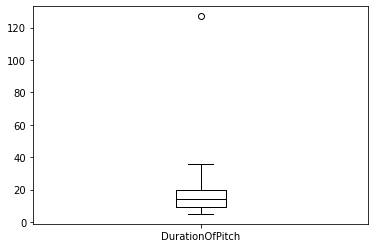

In [56]:
#Boxplot of the DurationOfPitch.
data.boxplot(column=['DurationOfPitch'], grid=False, color='black')

In [57]:
quartiles = np.quantile(data['DurationOfPitch'][data['DurationOfPitch'].notnull()], [.25, .75])
DurationOfPitch_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {DurationOfPitch_4iqr}')
outlier_DurationOfPitch = data.loc[np.abs(data['DurationOfPitch'] - data['DurationOfPitch'].median()) > DurationOfPitch_4iqr, 'DurationOfPitch']
outlier_DurationOfPitch

Q1 = 9.0, Q3 = 20.0, 4*IQR = 44.0


3878    127.0
Name: DurationOfPitch, dtype: float64

Since our 4IQR is 44, we can remove rows where this value is over 44.

In [58]:
data.loc[np.abs(data['DurationOfPitch'] - data['DurationOfPitch'].median()) > DurationOfPitch_4iqr, 'DurationOfPitch'] = np.nan

In [59]:
# dropping these rows
# [not run]
data.drop(outlier_DurationOfPitch.index, axis=0, inplace=True)

In [60]:
data.shape

(4127, 19)

4.3.3 Let's handle number of trips column

<AxesSubplot:>

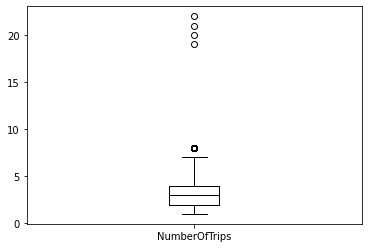

In [61]:
#Boxplot of the NumberOfTrips.
data.boxplot(column=['NumberOfTrips'], grid=False, color='black')

In [62]:
quartiles = np.quantile(data['NumberOfTrips'][data['NumberOfTrips'].notnull()], [.25, .75])
NumberOfTrips_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {NumberOfTrips_4iqr}')
outlier_NumberOfTrips = data.loc[np.abs(data['NumberOfTrips'] - data['NumberOfTrips'].median()) > NumberOfTrips_4iqr, 'NumberOfTrips']
outlier_NumberOfTrips

Q1 = 2.0, Q3 = 4.0, 4*IQR = 8.0


385     19.0
816     21.0
2829    20.0
3260    22.0
Name: NumberOfTrips, dtype: float64

All values exceeding IQR 8 can be dropped.

In [63]:
data.loc[np.abs(data['NumberOfTrips'] - data['NumberOfTrips'].median()) > NumberOfTrips_4iqr, 'NumberOfTrips'] = np.nan

In [64]:
# dropping these rows
# [not run]
data.drop(outlier_NumberOfTrips.index, axis=0, inplace=True)

In [65]:
data.shape

(4123, 19)

4.3.4 Let's handle monthly income column

<AxesSubplot:>

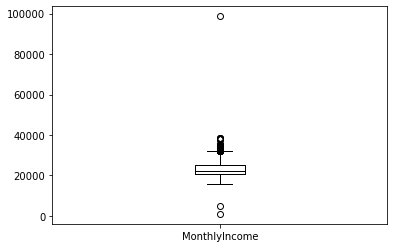

In [66]:
#Boxplot of the MonthlyIncome.
data.boxplot(column=['MonthlyIncome'], grid=False, color='black')

In [67]:
quartiles = np.quantile(data['MonthlyIncome'][data['MonthlyIncome'].notnull()], [.25, .75])
MonthlyIncome_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {MonthlyIncome_4iqr}')
outlier_MonthlyIncome = data.loc[np.abs(data['MonthlyIncome'] - data['MonthlyIncome'].median()) > MonthlyIncome_4iqr, 'MonthlyIncome']
outlier_MonthlyIncome

Q1 = 20751.0, Q3 = 25301.0, 4*IQR = 18200.0


142      1000.0
2482    98678.0
Name: MonthlyIncome, dtype: float64

We can drop rows which exceed 75% of our data ($25301) instead of 4IQR since that is less than the 3/4th value.

In [68]:
data.loc[np.abs(data['MonthlyIncome'] - data['MonthlyIncome'].median()) > quartiles[1], 'MonthlyIncome'] = np.nan

In [69]:
# dropping these rows
# [not run]
data.drop(outlier_MonthlyIncome.index, axis=0, inplace=True)

In [70]:
data.shape

(4121, 19)

In [71]:
quartiles = np.quantile(data['MonthlyIncome'][data['MonthlyIncome'].notnull()], [.25, .75])
MonthlyIncome_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {MonthlyIncome_4iqr}')
outlier_MonthlyIncome = data.loc[np.abs(data['MonthlyIncome'] - data['MonthlyIncome'].median()) > MonthlyIncome_4iqr, 'MonthlyIncome']
outlier_MonthlyIncome

Q1 = 20751.0, Q3 = 25301.0, 4*IQR = 18200.0


Series([], Name: MonthlyIncome, dtype: float64)

Now that our feature engineering and outlier detection is done, let's just check the data once.

In [72]:
data.head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0


4.3.5 Data Splitting (70-30) ratio

In [73]:
data_updated = pd.get_dummies(data, columns=['TypeofContact','CityTier','Occupation','Gender','NumberOfPersonVisiting','NumberOfFollowups','ProductPitched','PreferredPropertyStar','MaritalStatus','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','Designation'],drop_first=True)
data_updated.head()

,ProdTaken,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome,TypeofContact_Self Enquiry,CityTier_2,CityTier_3,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,NumberOfPersonVisiting_2,NumberOfPersonVisiting_3,NumberOfPersonVisiting_4,NumberOfPersonVisiting_5,NumberOfFollowups_2.0,NumberOfFollowups_3.0,NumberOfFollowups_4.0,NumberOfFollowups_5.0,NumberOfFollowups_6.0,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,PreferredPropertyStar_4.0,PreferredPropertyStar_5.0,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Passport_1,PitchSatisfactionScore_2,PitchSatisfactionScore_3,PitchSatisfactionScore_4,PitchSatisfactionScore_5,OwnCar_1,NumberOfChildrenVisiting_1.0,NumberOfChildrenVisiting_2.0,NumberOfChildrenVisiting_3.0,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.0,6.0,1.0,20993.0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0
1,0,49.0,14.0,2.0,20130.0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
2,1,37.0,8.0,7.0,17090.0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0
3,0,33.0,9.0,2.0,17909.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,0
5,0,32.0,8.0,1.0,18068.0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0


In [74]:
x = data_updated.drop('ProdTaken',axis=1)     # Predictor feature columns (8 X m)
y = data_updated['ProdTaken']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,DurationOfPitch,NumberOfTrips,MonthlyIncome,TypeofContact_Self Enquiry,CityTier_2,CityTier_3,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,NumberOfPersonVisiting_2,NumberOfPersonVisiting_3,NumberOfPersonVisiting_4,NumberOfPersonVisiting_5,NumberOfFollowups_2.0,NumberOfFollowups_3.0,NumberOfFollowups_4.0,NumberOfFollowups_5.0,NumberOfFollowups_6.0,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,PreferredPropertyStar_4.0,PreferredPropertyStar_5.0,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Passport_1,PitchSatisfactionScore_2,PitchSatisfactionScore_3,PitchSatisfactionScore_4,PitchSatisfactionScore_5,OwnCar_1,NumberOfChildrenVisiting_1.0,NumberOfChildrenVisiting_2.0,NumberOfChildrenVisiting_3.0,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
2101,44.0,14.0,3.0,17818.0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0
3326,37.0,7.0,4.0,28930.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0
4008,33.0,13.0,3.0,23688.0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0
280,53.0,9.0,4.0,32584.0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4651,42.0,14.0,8.0,23681.0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0


Let's check the split of the data

In [75]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data_updated.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data_updated.index)) * 100))

69.98% data is in training set
30.02% data is in test set


In [76]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [77]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### 5.0 Model building - Bagging

#### 5.1 Let's begin by building a decision tree model for the given data.

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 

In [78]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=1)

In [79]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

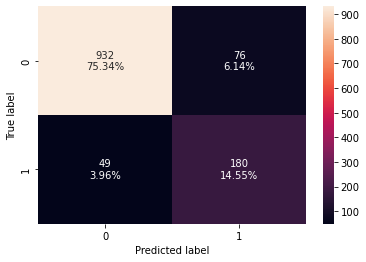

In [80]:
confusion_matrix_sklearn(dtree, x_test, y_test)

**Confusion Matrix -**

* Customer bought the product and the model predicted it correctly that the customer will buy the product :  True Positive (observed=1,predicted=1) = 14.55% based on the testing data.

* Customer did not buy the product and the model predicted that the customer will buy the product : False Positive (observed=0,predicted=1) = 6.14% based on the testing data.

* Customer did not buy the product and the model predicted that the customer will not buy the product : True Negative (observed=0,predicted=0) = 75.34% based on the testing data.

* Customer bought the product and the model predicted that the customer will not buy the product : False Negative (observed=1,predicted=0) = 3.96% based on the testing data.

In [81]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, x_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


Observation: As expected, the decision tree is overfitted on the training data.

In [82]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, x_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.898949  0.786026   0.703125  0.742268


Observation: On the testing data, there is a significant difference from the training data, which confirms the overfitting.

#### 5.2 Bagging Classifier

In [83]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(x_train,y_train)

BaggingClassifier(random_state=1)

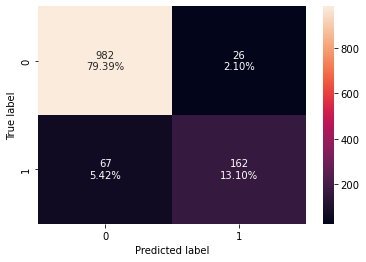

In [84]:
confusion_matrix_sklearn(bagging, x_test, y_test)

**Confusion Matrix -**

* Customer bought the product and the model predicted it correctly that the customer will buy the product :  True Positive (observed=1,predicted=1) = 13.10% based on the testing data.

* Customer did not buy the product and the model predicted that the customer will buy the product : False Positive (observed=0,predicted=1) = 2.10% based on the testing data.

* Customer did not buy the product and the model predicted that the customer will not buy the product : True Negative (observed=0,predicted=0) = 79.39% based on the testing data.

* Customer bought the product and the model predicted that the customer will not buy the product : False Negative (observed=1,predicted=0) = 5.42% based on the testing data.

In [85]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, x_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.992025  0.962898   0.996344  0.979335


In [86]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, x_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.924818  0.707424   0.861702  0.776978


Observation: There is a significant difference in the recall of training and testing data. Overfitting on training data and doing poorly on the testing data. This is a problem.

#### 5.3 Random Forest

In [87]:
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

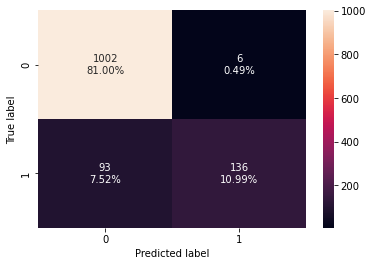

In [88]:
confusion_matrix_sklearn(rf,x_test,y_test)

**Confusion Matrix -**

* Customer bought the product and the model predicted it correctly that the customer will buy the product :  True Positive (observed=1,predicted=1) = 10.99% based on the testing data.

* Customer did not buy the product and the model predicted that the customer will buy the product : False Positive (observed=0,predicted=1) = 0.49% based on the testing data.

* Customer did not buy the product and the model predicted that the customer will not buy the product : True Negative (observed=0,predicted=0) = 81.00% based on the testing data.

* Customer bought the product and the model predicted that the customer will not buy the product : False Negative (observed=1,predicted=0) = 7.52% based on the testing data.

In [89]:
rf_model_train_perf=model_performance_classification_sklearn(rf,x_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [90]:
rf_model_test_perf=model_performance_classification_sklearn(rf,x_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.919968  0.593886   0.957746  0.733154


Observation: Random Forest does well on accuracy and precision but overall does a bad job on the testing data specially when it comes to Recall.

### 6.0 Model performance after tuning the 3 models listed above

#### 6.1 Decision Tree after tuning

In [91]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15, None],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=19, min_impurity_decrease=0.0001,
                       random_state=1)

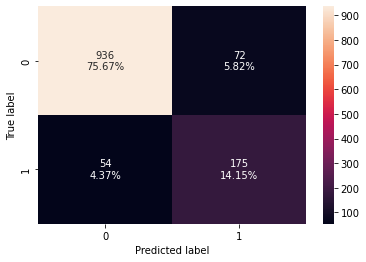

In [92]:
confusion_matrix_sklearn(dtree_estimator, x_test,y_test)

**Confusion Matrix -**

* Customer bought the product and the model predicted it correctly that the customer will buy the product :  True Positive (observed=1,predicted=1) = 14.15% based on the testing data.

* Customer did not buy the product and the model predicted that the customer will buy the product : False Positive (observed=0,predicted=1) = 5.82% based on the testing data.

* Customer did not buy the product and the model predicted that the customer will not buy the product : True Negative (observed=0,predicted=0) = 75.67% based on the testing data.

* Customer bought the product and the model predicted that the customer will not buy the product : False Negative (observed=1,predicted=0) = 4.37% based on the testing data.

In [93]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, x_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.995146  0.975265        1.0  0.987478


In [94]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, x_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.898141  0.764192   0.708502  0.735294


The recall of the tuned model has slightly decreased.

In [95]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(dtree_estimator.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
Age                           0.161789
DurationOfPitch               0.130848
MonthlyIncome                 0.107065
Designation_Executive         0.082351
Passport_1                    0.065928
NumberOfTrips                 0.052909
CityTier_3                    0.047352
TypeofContact_Self Enquiry    0.026022
PitchSatisfactionScore_3      0.022775
OwnCar_1                      0.020974
MaritalStatus_Married         0.020896
PreferredPropertyStar_5.0     0.020789
Gender_Male                   0.019486
MaritalStatus_Single          0.018378
NumberOfPersonVisiting_2      0.017566
NumberOfPersonVisiting_4      0.017447
NumberOfFollowups_5.0         0.017273
MaritalStatus_Unmarried       0.016635
PitchSatisfactionScore_4      0.015467
Occupation_Salaried           0.012409
NumberOfPersonVisiting_3      0.012142
PitchSatisfactionScore_5      0.011941
NumberOfFollowups_6.0         0.011278
Occupation_Large Business     0.011247
PreferredPropertyStar_4.0

#### 6.2 Bagging classifier with 80-20 weights

In [96]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [97]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.9, n_estimators=51, random_state=1)

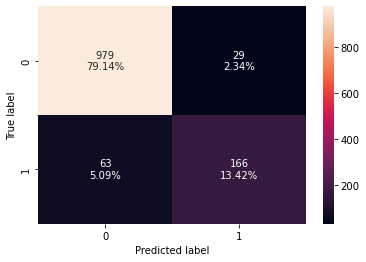

In [98]:
confusion_matrix_sklearn(bagging_estimator, x_test,y_test)

**Confusion Matrix -**

* Customer bought the product and the model predicted it correctly that the customer will buy the product :  True Positive (observed=1,predicted=1) = 13.42% based on the testing data.

* Customer did not buy the product and the model predicted that the customer will buy the product : False Positive (observed=0,predicted=1) = 2.34% based on the testing data.

* Customer did not buy the product and the model predicted that the customer will not buy the product : True Negative (observed=0,predicted=0) = 79.14% based on the testing data.

* Customer bought the product and the model predicted that the customer will not buy the product : False Negative (observed=1,predicted=0) = 5.09% based on the testing data.

In [99]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, x_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.999653  0.998233        1.0  0.999116


In [100]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, x_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.925627  0.724891   0.851282  0.783019


The recall and F1 score have slightly improved after tuning the model.

#### 6.3 Random forest with tuning

In [101]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(x_train, y_train)

RandomForestClassifier(max_features=0.9, n_estimators=501, random_state=1)

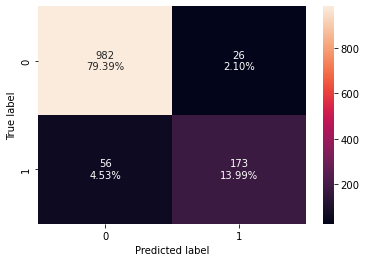

In [102]:
confusion_matrix_sklearn(rf_estimator, x_test,y_test)

**Confusion Matrix -**

* Customer bought the product and the model predicted it correctly that the customer will buy the product :  True Positive (observed=1,predicted=1) = 13.99% based on the testing data.

* Customer did not buy the product and the model predicted that the customer will buy the product : False Positive (observed=0,predicted=1) = 2.10% based on the testing data.

* Customer did not buy the product and the model predicted that the customer will not buy the product : True Negative (observed=0,predicted=0) = 79.39% based on the testing data.

* Customer bought the product and the model predicted that the customer will not buy the product : False Negative (observed=1,predicted=0) = 4.53% based on the testing data.

In [103]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, x_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [104]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, x_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.933711  0.755459   0.869347  0.808411


If we compare random forest without tuning and with tuning, then after tuning we note that all parameters have significantly improved.

The best metric in this case will be recall, because we want to know whether the customer will buy the product before we contact them, so we need to see historic data to see what customer profile purchased the product when we contacted them.

### 7.0 Model building - Boosting

In [105]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

In [106]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))
    
    # returning the list with train and test scores
    return score_list

In [109]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

#### 7.1 Ada Boost

In [110]:
ab_regressor=AdaBoostRegressor(random_state=1)
ab_regressor.fit(x_train,y_train)

AdaBoostRegressor(random_state=1)

In [111]:
ab_regressor_model_train_perf = model_performance_regression(ab_regressor, x_train,y_train)
print("Training performance \n",ab_regressor_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.359189  0.250214   0.182086        0.169995   inf


In [112]:
ab_regressor_model_test_perf = model_performance_regression(ab_regressor, x_test,y_test)
print("Testing performance \n",ab_regressor_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.357621  0.248981   0.152207        0.122385   inf


The R^2 in training and testing data sets are comparable (18.2% and 15.2%). However, we have RMSE of about 35%, which is slightly concerning.

#### 7.2 Gradient Boosting Regressor

In [113]:
gb_estimator=GradientBoostingRegressor(random_state=1)
gb_estimator.fit(x_train,y_train)

GradientBoostingRegressor(random_state=1)

In [114]:
gb_estimator_model_train_perf = model_performance_regression(gb_estimator, x_train,y_train)
print("Training performance \n",gb_estimator_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.292849  0.203102   0.456315        0.448277   inf


In [115]:
gb_estimator_model_test_perf = model_performance_regression(gb_estimator, x_test, y_test)
print("Testing performance \n",gb_estimator_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.312893  0.222159   0.351016        0.328188   inf


The R^2 in training and testing data sets are not comparable (45% and 35%). This is not a good model.

#### 7.3 XGBoost Regressor

In [116]:
xgb_estimator=XGBRegressor(random_state=1)
xgb_estimator.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [117]:
xgb_estimator_model_train_perf = model_performance_regression(xgb_estimator, x_train, y_train)
print("Training performance \n",xgb_estimator_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.065336  0.042221   0.972938        0.972537   inf


In [118]:
xgb_estimator_model_test_perf = model_performance_regression(xgb_estimator, x_test,y_test)
print("Testing performance \n",xgb_estimator_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.241105  0.150246   0.614651        0.601096   inf


The R^2 in training and testing data sets are not comparable (97% and 61%) and hence this is not a good model.

### 8.0 Model performance after tuning the 3 models listed above

#### 8.1 Tuning the ada boost regressor model

In [119]:
# Choose the type of classifier. 
ab_tuned = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(x_train, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=20, random_state=1)

In [120]:
ab_tuned_model_train_perf = model_performance_regression(ab_tuned, x_train,y_train)
print("Training performance \n",ab_tuned_model_train_perf)

Training performance 
       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.35407  0.274388   0.205236        0.193487   inf


In [121]:
ab_tuned_model_test_perf = model_performance_regression(ab_tuned, x_test,y_test)
print("Testing performance \n",ab_tuned_model_train_perf)

Testing performance 
       RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.35407  0.274388   0.205236        0.193487   inf


The R^2 in training and testing data sets are comparable (20%) and hence this seems to be a decent model.

#### 8.2 Tuning the gradient boost regressor model

In [122]:
# Choose the type of classifier. 
gb_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25), 
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
gb_tuned.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=10, max_features=0.7, n_estimators=175,
                          random_state=1, subsample=0.9)

In [123]:
gb_tuned_model_train_perf = model_performance_regression(gb_tuned, x_train,y_train)
print("Training performance \n",gb_tuned_model_train_perf)

Training performance 
        RMSE      MAE  R-squared  Adj. R-squared  MAPE
0  0.001836  0.00131   0.999979        0.999978   inf


In [124]:
gb_tuned_model_test_perf = model_performance_regression(gb_tuned, x_test, y_test)
print("Testing performance \n",gb_tuned_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.207523  0.116393   0.714521        0.704479   inf


The R^2 in training and testing data sets are not comparable, however the RMSE on the training data set is pretty low.

Among the 3 models, Ada Boost model has comparable R^2 values among training and testing data set, hence this is a good model.

### 9.0 Insights and Recommendations

Comparing models:
1. Without tuning, among bagging models, decision tree's true positive was the highest and random forest true positive was lowest.
2. Without tuning, among bagging models, decision tree's false negative was the lowest and random forest false negative was highest.
3. After tuning, among bagging models, decision tree's false negative was the lowest and bagging classifier false negative was highest.
4. In boosting models, Ada boost performance with and without tuning was the best.

Insights into customer profile about prospective clients who can or cannot buy the product.
1. Married people tend to take the product the most followed by single people, followed by unmarried and lastly by divorced people.
2. Among those who did not take the product, married couple were at the top, followed by divorced people, followed by unmarried and lastly by single people.
3. Customers who have taken 2 trips in the past tend to take the product the most, followed by those who took 3 trips. This, unfortunately, is also the case with customers who did not buy the product.
4. Customers who have a passport tend to take the product more than those who take the product without a passport.